# Day 1, Part 5: Ellipses, Parabolas, Hyperbolas oh my!

Let's recall some of the equations for conic sections:
 * ellipse centered at $(x_0, y_0)$: $\frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2}$ = 1
 * parabola with lowest point $(x_0, y_0)$: $y = a(x - x_0)^2 + y_0$
    * another form, called standard form: $y = ax^2 + bx + c$
    * more about parabolas: https://www.khanacademy.org/math/precalculus/conics-precalc/focus-and-directrix-of-a-parabola/v/focus-and-directrix-introduction
 * hyperbola: $\frac{x^2}{a^2} - \frac{y^2}{b^2} = 1$

Let's write a function that takes in a, b, x_0 and y_0 and plots an ellipse.
What is the best way to do this?  Usually its easier to plot things as y(x) i.e. y as a function of x this means we have to solve for y:
$y = y_0 \pm \sqrt{ b^2 - \frac{b^2}{a^2} (x - x_0)^2 }$

The $\pm$ here just reminds us that for solving quadratics, we have to do the "upper" and "lower" solutions.  Let's program this!

In [106]:
def myEllipseFunctionUpper(a, b, x0, y0, x):
    y = y0 + ( b**2 - b**2/a**2*(x-x0)**2 )**0.5
    return y

def myEllipseFunctionLower(a, b, x0, y0, x):
    y = y0 - ( b**2 - b**2/a**2*(x-x0)**2 )**0.5
    return y

In [107]:
# lets choose some parameters:
a = 5
b = 2
x0 = 5
y0 = -1

What do we choose for x?  We know that from before we want to use np.arange with x=np.arange(xmin, xmax, xsteps) where xmin is our minimum x and xmax is our maximum x, and xsteps is the size of our steps.  Before getting fancy about it, lets try just guessing:


In [113]:
x = np.arange(-1, 5, 0.01)

/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


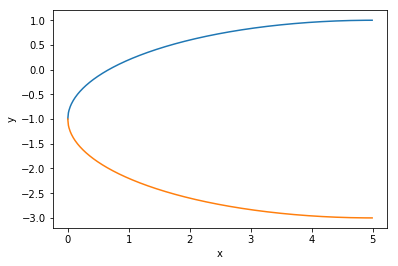

In [118]:
# let's try plotting!
# (1)
y_upper = myEllipseFunctionUpper(a, b, x0, y0, x)

plt.plot(x, y_upper)

# (2) now let's add the lower part
y_lower = myEllipseFunctionLower(a, b, x0, y0, x)
plt.plot(x, y_lower)

# (3) lets also label what is what
plt.xlabel('x')
plt.ylabel('y')

# (4) lets also have it not plot out anything when it plots:
plt.show()

Ok, let's note a few things here.  First, we have 2 different colors for the upper and lower parts of our ellipse. Also, our ellipse only goes to 1/2 of the whole way around!  This is because we have selected our "x" input vector to only cover 1/2 of the whole domain of our ellipse.  We can see that by overplotting the point $(x_0, y_0)$ on our graph:

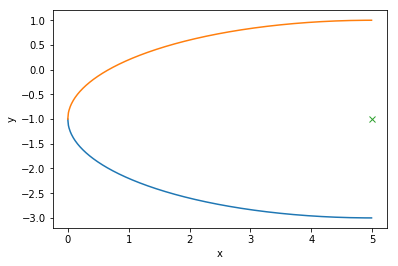

In [119]:
plt.plot(x, y_lower)
plt.plot(x, y_upper)

plt.plot(x0, y0, 'x') #this last entry here just says put an "x" at this point

plt.xlabel('x')
plt.ylabel('y')

plt.show()

Ok, so we can see that we clearly are only covering 1/2 of our ellipse - just the part left of the center, denoted with the "x".  We can fix this easily by increasing our x-range:

/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


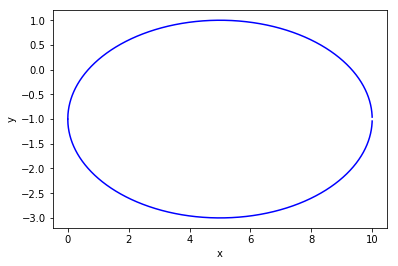

In [124]:
# it looks like our ellipse should extend until 10 on the x-direction
x = np.arange(-1, 10, 0.001)

# lets re-call our upper and lower functions
y_upper = myEllipseFunctionUpper(a, b, x0, y0, x)
y_lower = myEllipseFunctionLower(a, b, x0, y0, x)

# lets plot and make them the same color
plt.plot(x, y_upper, 'b-')
plt.plot(x, y_lower, 'b-')
# the b- just means "use a blue (b) line (-)"
# try changing it to a few things like "--" instead of "-"
#  and "m" instead of "b"

# our labels
plt.xlabel('x')
plt.ylabel('y')


plt.show()

# note: we can make the "gab" at the end smaller by taking smaller
# xstep steps in x

Ok, so why are we getting these errors about invalid values?  Well, lets think about this.  It says we are getting errors in the sqrt - so maybe we should look at that formula again:

$\sqrt{ b^2 - \frac{b^2}{a^2} (x - x_0)^2 }$

So there could be issues if we are trying to take the square root of a negative number. (Note: you can technically do this using imaginary numbers, but we're staying in the real number space for our own sanity!).  With our values of:

a = 5

b = 2

x0 = 5

y0 = -1

This is likely negative when x < 0.  Let's test that:

In [125]:
b**2 - b**2/a**2*(-1 - x0)**2
# yup!  we get a negative number.

-1.7599999999999998

Let's change our domain to only x >= 0 and go from there:

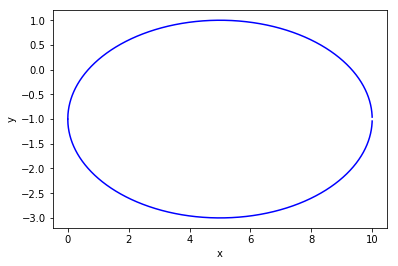

In [126]:
x = np.arange(0, 10, 0.001)

# lets re-call our upper and lower functions
y_upper = myEllipseFunctionUpper(a, b, x0, y0, x)
y_lower = myEllipseFunctionLower(a, b, x0, y0, x)

# lets plot and make them the same color
plt.plot(x, y_upper, 'b-')
plt.plot(x, y_lower, 'b-')

# our labels
plt.xlabel('x')
plt.ylabel('y')


plt.show()


Tah dah!

So, we should feel pretty good about ourselves right now. But maybe is there an easier way to do this?  There are a few!  So, one thing we can do is chose our x-values wisely.  

So, from our definitions of ellipses, we know that the maximum and minimum in x is $\pm$ a around the point $x_0$ and the maximum and minimum in y is $\pm$ b around $y_0$. So we could start with just that in our "x" array:

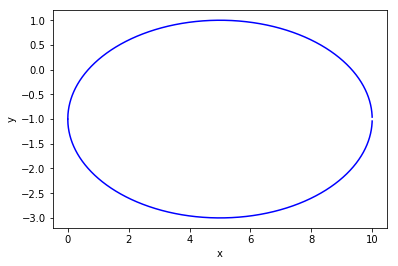

In [129]:
x = np.arange(x0-a, x0+a, 0.001)

# lets re-call our upper and lower functions
y_upper = myEllipseFunctionUpper(a, b, x0, y0, x) 
y_lower = myEllipseFunctionLower(a, b, x0, y0, x)

# lets plot and make them the same color
plt.plot(x, y_upper, 'b-')
plt.plot(x, y_lower, 'b-')

# our labels
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In summary, we should always be careful about how we choose not only our plotting domains, but our calculation domains as well.

## 8.1 Exercises - Possibly skip this
1. Make a function that plots a parabola - do you need more than one function?

Bonus: how would you extend this to plot multiple parabolas or include an ellipse on the same axis? 

Bonus bonus: do the same thing but for hyperbolas - do you notice anything interesting?

# 9. Radius-angle formation of an ellipse
What if I told you we could use the following formulation for an ellipse?

For a origin-centered ellipse:
$r(\theta) = \frac{b}{\sqrt{1 - (e \cos(\theta) )^2}}$

For a foci-centered ellipse:
$r(\theta) = \frac{ a(1-e^2) }{1-e \cos(\theta) }$

Where:
$e = \sqrt{ 1- \frac{b^2}{a^2} }$

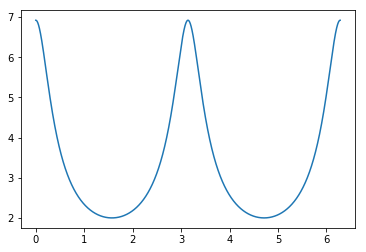

In [136]:
# lets try plotting one:
#x = np.arange(x0-a, x0+a, 0.001)
theta = np.arange(0, 2*np.pi, 0.001)

ecc = np.sqrt(1-b**2/a**2)

r = b/np.sqrt(1-ecc*(np.cos(theta))**2)

# lets plot and make them the same color
plt.plot(theta, r)

plt.show()

So that clearly looks a little funny - this is because we have to tell matplotlib we are plotting polar coords.  To do this, we have to write our code a little differentely:


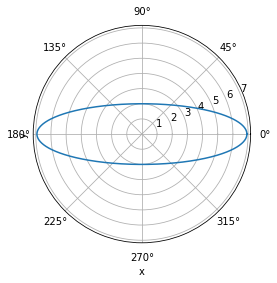

In [135]:
theta = np.arange(0, 2*np.pi, 0.001)

ecc = np.sqrt(1-b**2/a**2)

r = b/np.sqrt(1-ecc*(np.cos(theta))**2)

# lets plot and make them the same color
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(theta, r)

plt.show()

Ok, but maybe this isn't what we want - we want to plot this r and $\theta$ function, but on a cartesian plot.  We can do this if we recall:

$x = r cos(\theta) $

$y = r sin(\theta) $

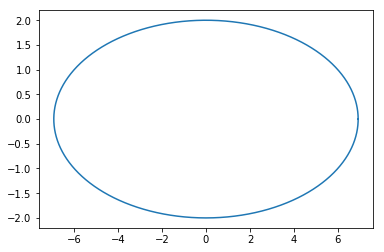

In [137]:
# we can use our fig/ax stuff like before, just for practice

x = r*np.cos(theta)
y = r*np.sin(theta)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)

plt.show()

Note this explicitly assumes the ellipse is at the center.  We can move this explicitly back to where we think it should be based on $x_0$ and $y_0$ then:

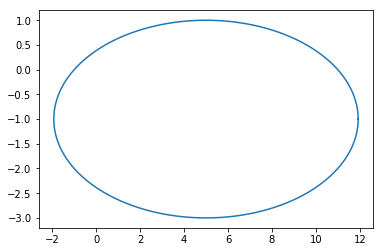

In [139]:
x = r*np.cos(theta)+x0
y = r*np.sin(theta)+y0

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)

plt.show()

Why would we bother with all of this?  Because it naturally selects for the upper and lower parts without us having to write separate functions for each.  This will be useful to us later on...

## Exercises

1. Plot an ellipse centered at (-5, 5) with a major axis of 10 and a minor axis of 5
1. Plot the same ellipse but with one of the foci centered at (-5, 5)
1. What is the area of your ellipse? (use Python to calculate)

Bonus: How can you use Python and the formulas above to calculate the area of angular subsections of the ellipses?  For example for an angular section of 45$^\circ$?  

Bonus Bonus: how would you draw this? (Hint: google polygon fill and fill-between in Python)